# Introduction to Linear Regression

In this notebook I try make a prediction with linear regression. Like a features to predict I take two semester grade, studytime, failures and absences, by this data I try to predict a final grade. First of all, I import all of useful libraries and take a dataset of students:

In [95]:
#import dependencies
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pickle

#read our data
data = pd.read_csv('student-mat.csv', sep=';')
data.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


## Attributes for prediction

After I take needed attribute to predict.

In [96]:
#take only important features
data = data[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']]
data.head(3)

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10


In [97]:
#define the predict value
predict = 'G3'

#define the data for prediction and predict value
X = np.array(data.drop([predict], 1))
y = np.array(data[predict])

## Save the model

I create the model and take the best accuracy, and save to pickle.

In [98]:
#function to the save a model
def create_model(linear):
    with open('studentmodel.pickle', 'wb') as f:
        pickle.dump(linear, f)

    pickle_in = open('studentmodel.pickle', 'rb')
    linear = pickle.load(pickle_in)

In [99]:
#iterate 30 times to select best accuracy
best = 0
for i in range(30):
    #split data to test and train
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

    #create the linear regression model for predicting
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    
    if acc>best:
        best = acc
        create_model(linear)

In [100]:
#print the accuracy
print(best)

0.95570846996574


# Data visualization

After creating the model, I try visualize my model, and first of all, I import all useful libraries to do it.

In [111]:
#import dependencies
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

#choose a style of the plot
style.use('ggplot')

In [112]:
#create the function to visualize data
def visualize_data(p):
    plt.scatter(data[p], data['G3'])
    plt.xlabel(p)
    plt.ylabel('Final Grade')
    plt.show()

Visualize the data with the grades of two semester and absences with final grade

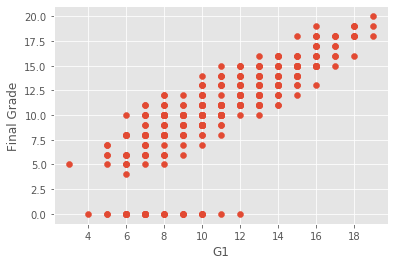

In [114]:
visualize_data('G1')

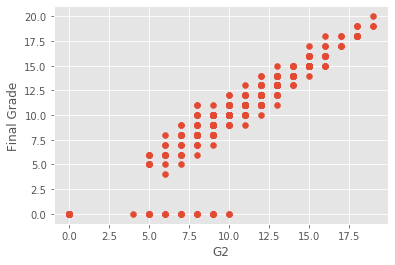

In [115]:
visualize_data('G2')

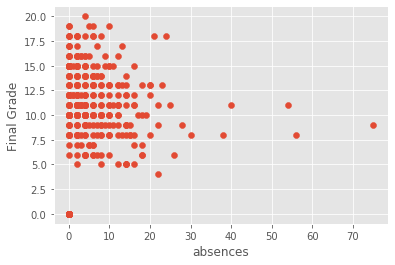

In [116]:
visualize_data('absences')

# Conclusion

It is beginner project for predict a final grade using very simple algorithm named "Linear Regression". There's no something new, it is just practice for only start to study machine learning, and using real dataset I try predict some value. I hope that this notebook was useful. <br>
Happy Coding!